In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from imblearn.over_sampling import SMOTE


In [2]:
df=pd.read_csv(r"train.csv")

In [3]:
df.shape

(614, 13)

In [4]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.sample(n=5,replace=False)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N
371,LP002197,Male,Yes,2,Graduate,No,5185,0.0,155.0,360.0,1.0,Semiurban,Y
465,LP002494,Male,No,0,Graduate,No,6000,0.0,140.0,360.0,1.0,Rural,Y
242,LP001806,Male,No,0,Graduate,No,2965,5701.0,155.0,60.0,1.0,Urban,Y
534,LP002731,Female,No,0,Not Graduate,Yes,18165,0.0,125.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
df["Loan_Status"].value_counts()  #Unbalanced

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\kannu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

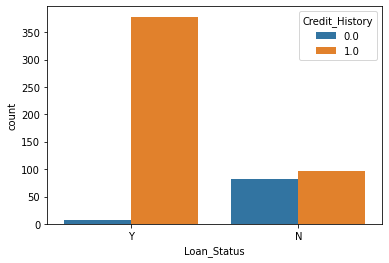

In [11]:
sns.countplot(df['Loan_Status'],hue=df["Credit_History"])

In [12]:
df['Gender'].fillna(df["Gender"].mode()[0],inplace=True)

In [13]:
df['Married'].fillna(df["Married"].mode()[0],inplace=True)

In [14]:
df['Self_Employed'].fillna(df["Self_Employed"].mode()[0],inplace=True)

In [15]:
df['Credit_History'].fillna(df["Credit_History"].mode()[0],inplace=True)

In [16]:
df['Dependents'].fillna(df["Dependents"].mode()[0],inplace=True)

In [17]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
df['LoanAmount'].fillna(df["LoanAmount"].mean(),inplace=True)

In [19]:
df['Loan_Amount_Term'].fillna(df["Loan_Amount_Term"].mean(),inplace=True)

In [20]:
df.drop("Loan_ID",inplace=True,axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [22]:
df["Dependents"].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [23]:
df["Dependents"]=df["Dependents"].apply(lambda x:3 if x=="3+" else x)

In [24]:
df["Dependents"]=df["Dependents"].astype('int')

In [25]:
x,y=df.drop("Loan_Status",axis=1),df["Loan_Status"]

In [26]:
y.replace({'Y': 1, 'N': 0},inplace=True)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,stratify=y)

In [28]:
ohe=OneHotEncoder(drop='first',sparse=False, dtype='int')
transformer=ColumnTransformer(transformers=[('ohe',ohe,["Gender","Married","Education","Self_Employed","Property_Area"])],remainder='passthrough')
x_train_enc=transformer.fit_transform(x_train)

In [29]:
x_train_enc.dtype

dtype('float64')

In [30]:
x_test_enc=transformer.transform(x_test)

In [31]:
log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(x_train_enc,y_train)
print(f"Training Score= {log_reg.score(x_train_enc,y_train)}")
print(f"Training Score= {log_reg.score(x_test_enc,y_test)}")

Training Score= 0.8085539714867617
Training Score= 0.8292682926829268


In [32]:
std_scaler=StandardScaler()
x_train_scaled=std_scaler.fit_transform(x_train_enc)
x_test_scaled=std_scaler.transform(x_test_enc)

In [33]:
knn=KNeighborsClassifier()
hyp_param={"n_neighbors":np.arange(2,20),"p":[1,2]}

grid_cv=GridSearchCV(knn,hyp_param)
grid_cv.fit(x_train_scaled,y_train)
grid_cv.best_params_

{'n_neighbors': 13, 'p': 2}

In [34]:
knn_tuned=grid_cv.best_estimator_

In [35]:
knn_tuned.fit(x_train_scaled,y_train)
print(f"Training Score= {knn_tuned.score(x_train_enc,y_train)}")
print(f"Testing Score= {knn_tuned.score(x_test_enc,y_test)}")

Training Score= 0.5274949083503055
Testing Score= 0.5447154471544715


In [36]:
dt=DecisionTreeClassifier()
hyp_parm_dt={"criterion":["entropy","gini"],
             "max_depth":np.arange(3,8),
             "min_samples_split":np.arange(3,8),
             "min_samples_leaf":np.arange(3,8),
             "random_state":[5]}

grd_cv=GridSearchCV(dt,hyp_parm_dt)
grd_cv.fit(x_train_enc,y_train)
grd_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'random_state': 5}

In [37]:
dt_tuned=grd_cv.best_estimator_
dt_tuned.fit(x_train_enc,y_train)
print(f"Training Score= {dt_tuned.score(x_train_enc,y_train)}")
print(f"Testing Score= {dt_tuned.score(x_test_enc,y_test)}")

Training Score= 0.8065173116089613
Testing Score= 0.8292682926829268


In [38]:
rf=RandomForestClassifier()
hyp_rf={"n_estimators":np.arange(80,150),
       "max_depth":np.arange(3,8),
       "min_samples_split":np.arange(3,8),
       "criterion":["gini","entropy"],
       "min_samples_leaf":np.arange(3,8),
       "random_state":[5]}
rd_cv=RandomizedSearchCV(rf,hyp_rf)
rd_cv.fit(x_train_enc,y_train)
rd_cv.best_params_

{'random_state': 5,
 'n_estimators': 86,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_depth': 5,
 'criterion': 'gini'}

In [39]:
rf_tuned=rd_cv.best_estimator_
rf_tuned.fit(x_train_enc,y_train)
print(f"Training Score= {rf_tuned.score(x_train_enc,y_train)}")
print(f"Testing Score= {rf_tuned.score(x_test_enc,y_test)}")

Training Score= 0.8085539714867617
Testing Score= 0.8292682926829268


In [47]:
xg=XGBClassifier()
hyp_rf={"n_estimators":np.arange(80,150),
       "max_depth":np.arange(3,8),
       "random_state":[5],
       "learning_rate":[.001,.01,.0001,.1,.5,.8,1]}

xg_rm=RandomizedSearchCV(xg,hyp_rf)
xg_rm.fit(x_train_enc,y_train)
xg_rm.best_params_

{'random_state': 5, 'n_estimators': 136, 'max_depth': 3, 'learning_rate': 0.01}

In [48]:
xg_tuned=xg_rm.best_estimator_
xg_tuned.fit(x_train_enc,y_train)
print(f"Training Score= {xg_tuned.score(x_train_enc,y_train)}")
print(f"Testing Score= {xg_tuned.score(x_test_enc,y_test)}")

Training Score= 0.8065173116089613
Testing Score= 0.8292682926829268


In [52]:
support_vm=SVC(C=.001)
support_vm.fit(x_train_enc,y_train)
print(f"Training Score= {support_vm.score(x_train_enc,y_train)}")
print(f"Testing Score= {support_vm.score(x_test_enc,y_test)}")

Training Score= 0.6863543788187373
Testing Score= 0.6910569105691057


In [ ]:
#Balancing the target and again modeling

In [58]:
smote=SMOTE()
x_train_bal,y_train_bal=smote.fit_resample(x_train_enc,y_train)
x_test_bal,y_test_bal=smote.fit_resample(x_test_enc,y_test)

In [59]:
log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(x_train_bal,y_train_bal)
print(f"Training Score= {log_reg.score(x_train_bal,y_train_bal)}")
print(f"Training Score= {log_reg.score(x_test_bal,y_test_bal)}")

Training Score= 0.7462908011869436
Training Score= 0.7588235294117647


In [61]:
dt=DecisionTreeClassifier()
hyp_parm_dt={"criterion":["entropy","gini"],
             "max_depth":np.arange(3,8),
             "min_samples_split":np.arange(3,8),
             "min_samples_leaf":np.arange(3,8),
             "random_state":[5]}

grd_cv=GridSearchCV(dt,hyp_parm_dt)
grd_cv.fit(x_train_bal,y_train_bal)

dt_tuned=grd_cv.best_estimator_
dt_tuned.fit(x_train_bal,y_train_bal)
print(f"Training Score= {dt_tuned.score(x_train_bal,y_train_bal)}")
print(f"Testing Score= {dt_tuned.score(x_test_bal,y_test_bal)}")


Training Score= 0.8056379821958457
Testing Score= 0.8470588235294118


In [62]:
rf=RandomForestClassifier()
hyp_rf={"n_estimators":np.arange(80,150),
       "max_depth":np.arange(3,8),
       "min_samples_split":np.arange(3,8),
       "criterion":["gini","entropy"],
       "min_samples_leaf":np.arange(3,8),
       "random_state":[5]}
rd_cv=RandomizedSearchCV(rf,hyp_rf)
rd_cv.fit(x_train_bal,y_train_bal)
rf_tuned=rd_cv.best_estimator_
rf_tuned.fit(x_train_bal,y_train_bal)
print(f"Training Score= {rf_tuned.score(x_train_bal,y_train_bal)}")
print(f"Testing Score= {rf_tuned.score(x_test_bal,y_test_bal)}")

Training Score= 0.8694362017804155
Testing Score= 0.8411764705882353


In [63]:
xg=XGBClassifier()
hyp_rf={"n_estimators":np.arange(80,150),
       "max_depth":np.arange(3,8),
       "random_state":[5],
       "learning_rate":[.001,.01,.0001,.1,.5,.8,1]}

xg_rm=RandomizedSearchCV(xg,hyp_rf)
xg_rm.fit(x_train_bal,y_train_bal)

xg_tuned=xg_rm.best_estimator_
xg_tuned.fit(x_train_bal,y_train_bal)
print(f"Training Score= {xg_tuned.score(x_train_bal,y_train_bal)}")
print(f"Testing Score= {xg_tuned.score(x_test_bal,y_test_bal)}")

Training Score= 0.9985163204747775
Testing Score= 0.7941176470588235


In [68]:
rf_tuned.feature_importances_

array([0.01697111, 0.08108655, 0.05865322, 0.0101988 , 0.10117667,
       0.04894244, 0.04111012, 0.07168497, 0.04531809, 0.06952478,
       0.02198223, 0.43335102])

In [75]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural
610,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban


In [77]:
y_train_pred=rf_tuned.predict(x_train_bal)
y_test_pred=rf_tuned.predict(x_test_bal)

In [79]:
cr_train=classification_report(y_train_bal,y_train_pred)
print(cr_train)

              precision    recall  f1-score   support

           0       0.98      0.76      0.85       337
           1       0.80      0.98      0.88       337

    accuracy                           0.87       674
   macro avg       0.89      0.87      0.87       674
weighted avg       0.89      0.87      0.87       674



In [80]:
cr_test=classification_report(y_test_bal,y_test_pred)
print(cr_test)

              precision    recall  f1-score   support

           0       0.97      0.71      0.82        85
           1       0.77      0.98      0.86        85

    accuracy                           0.84       170
   macro avg       0.87      0.84      0.84       170
weighted avg       0.87      0.84      0.84       170

